# ***ANALISANDO DADOS COM PYTHON (Carregando Dados e Bibliotecas)***

In [1]:
#Importação das bibliotecas e leitura dos dados

import pandas as pd #----Manipulação dos dados em modelo tabular

import seaborn as sb #----Criação de gráficos personalizados

import matplotlib.pyplot as plt#----Customização de figuras

import datetime as dt #----Manipulação de datas

df = pd.read_csv('Factory_Salary.csv')#----Passando os dados para uma variável através do Pandas

In [2]:
#LINK DO REPOSITÓRIO ORIGINAL
#https://www.kaggle.com/datasets/ivangavrilove88/factorys-salary
df.head()

,Date,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary
0,2009-01-01,Metal heater,7,Heating furnaces,22,580,26020.0
1,2009-01-01,Metal heater,6,Heating furnaces,22,580,22980.0
2,2009-01-01,Metal heater,5,Heating furnaces,22,580,20350.0
3,2009-01-01,Metal heater,5,Heating furnaces,22,580,20350.0
4,2009-01-01,Metal heater,4,Heating furnaces,22,580,18090.0


# **Analisando a distribuição dos salários (Salary)**



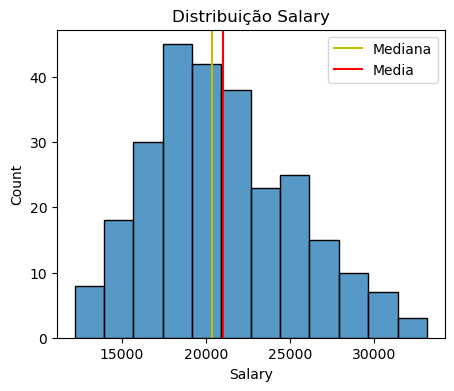

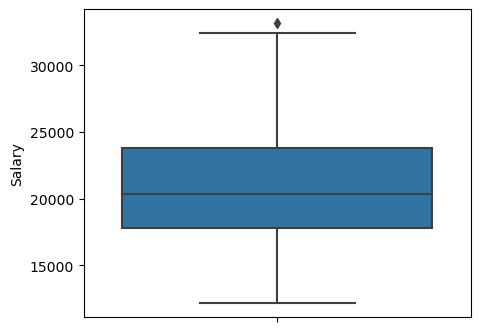


RESUMO ESTATÍSTICO



count      264.000000
mean     21030.461230
std       4323.920780
min      12180.000000
25%      17830.000000
50%      20350.000000
75%      23818.014706
max      33157.058824
Name: Salary, dtype: float64

In [3]:
x, y = 5, 4
#Gerando histograma

plt.figure(figsize=(x,y))
sb.histplot(df.Salary)
plt.axvline(df.Salary.median(),color='y',label='Mediana')
plt.axvline(df.Salary.mean(),color='r',label='Media')
plt.title('Distribuição Salary')
plt.legend()
plt.show()

#Gerando boxplot
plt.figure(figsize=(x,y))
sb.boxplot(y=df.Salary,orient='v')
plt.show()

#Gerando resumo estatístico
print('\nRESUMO ESTATÍSTICO\n')
df.Salary.describe()

# **Analisando a influência da Data (Date)**

In [4]:
df['Date'].unique()

array(['2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
       '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
       '2009-09-01', '2009-10-01', '2009-11-01', '2009-12-01'],
      dtype=object)

In [5]:
#Extraindo o mês
df['Date'] = pd.to_datetime(df['Date'])
df['month'] = df['Date'].dt.month
df.head()

,Date,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary,month
0,2009-01-01,Metal heater,7,Heating furnaces,22,580,26020.0,1
1,2009-01-01,Metal heater,6,Heating furnaces,22,580,22980.0,1
2,2009-01-01,Metal heater,5,Heating furnaces,22,580,20350.0,1
3,2009-01-01,Metal heater,5,Heating furnaces,22,580,20350.0,1
4,2009-01-01,Metal heater,4,Heating furnaces,22,580,18090.0,1


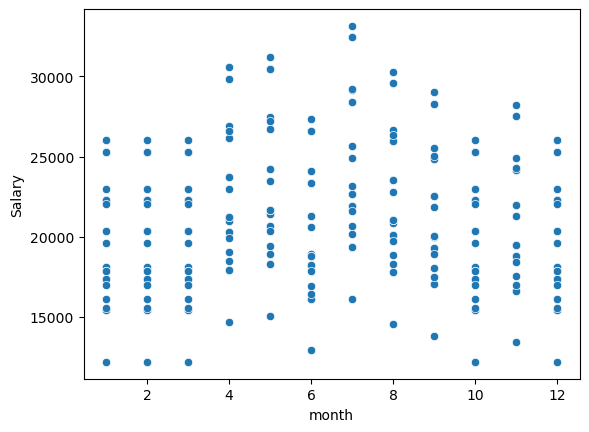

In [6]:
sb.scatterplot(x=df.month,y=df.Salary)
plt.show()

# Conclusões até aqui:
#A variável Date (data) demonstra um certa influência no valor do salário.




---



# **Analisando Variáveis Númericas (Rank, Insaubrity, Size_Production)**



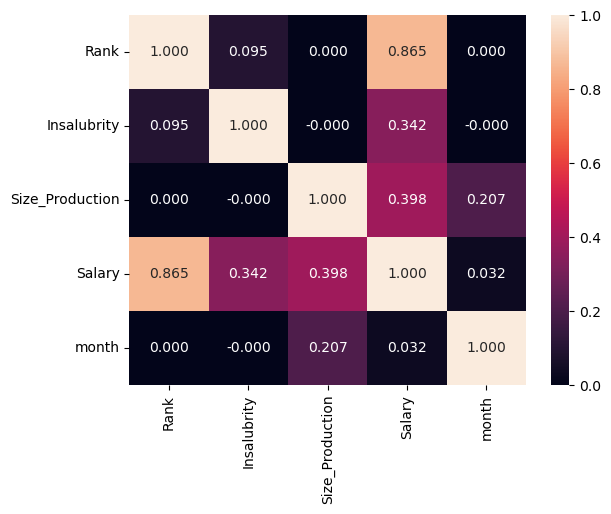

In [7]:
sb.heatmap(df.corr(),annot=True,fmt=".3f")
plt.show()

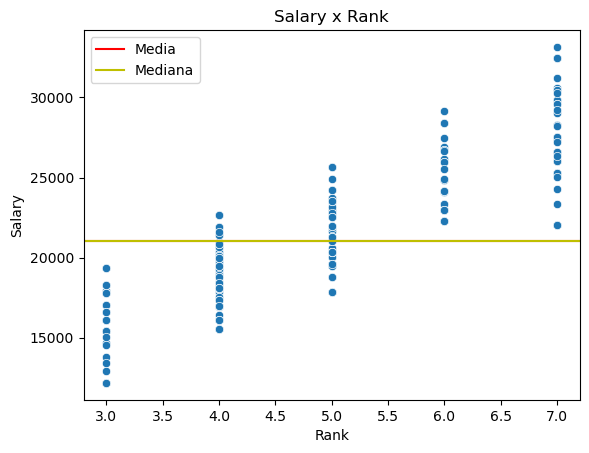

In [8]:
sb.scatterplot(y=df.Salary,x=df.Rank)
plt.title('Salary x Rank')
plt.axhline(df.Salary.mean(),color='r',label='Media')
plt.axhline(df.Salary.mean(),color='y',label='Mediana')
plt.legend()
plt.show()

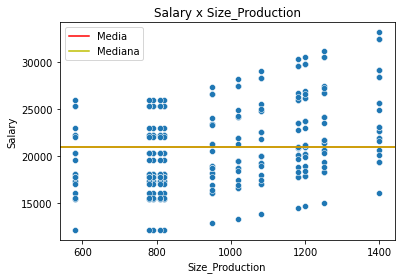

In [ ]:
sb.scatterplot(y=df.Salary,x=df.Size_Production)
plt.title('Salary x Size_Production')
plt.axhline(df.Salary.mean(),color='r',label='Media')
plt.axhline(df.Salary.mean(),color='y',label='Mediana')
plt.legend()
plt.show()

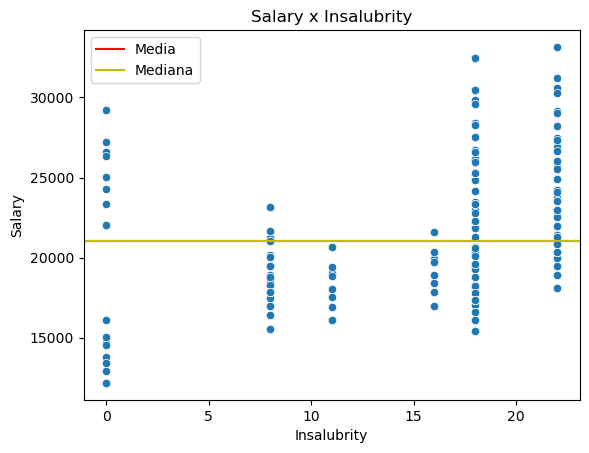

In [9]:
sb.scatterplot(y=df.Salary,x=df.Insalubrity)
plt.title('Salary x Insalubrity')
plt.axhline(df.Salary.mean(),color='r',label='Media')
plt.axhline(df.Salary.mean(),color='y',label='Mediana')
plt.legend()
plt.show()

# Conclusões até aqui:
#As variáveis Rank, Insalubrity e Size_Production tem uma correlação significativa com a variável Salary.

---



# **Analisando Size_Production**

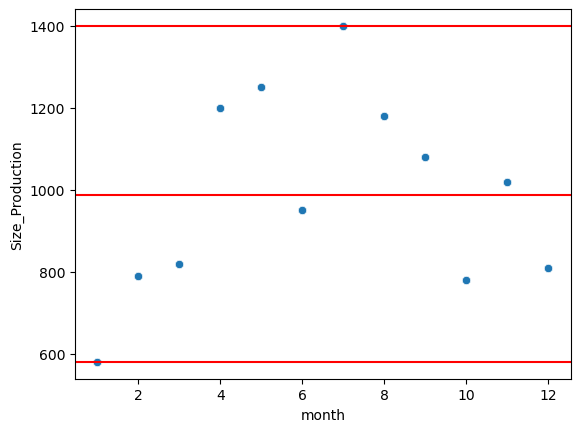

In [10]:
sb.scatterplot(x=df.month,y=df.Size_Production)
plt.axhline(max(df.Size_Production),color='r')
plt.axhline(min(df.Size_Production),color='r')
plt.axhline(df.Size_Production.mean(),color='r')
plt.show()

# **Analisando Profissão (Profession)**

In [11]:
profissoes = list(df.Profession.unique())

In [12]:
profissoes

['Metal heater',
 'Metal planter',
 'Refractory',
 'Roller',
 'Roller assistant',
 'Hot metal cutter',
 'Cleaner',
 'Operator',
 'Quality controller']

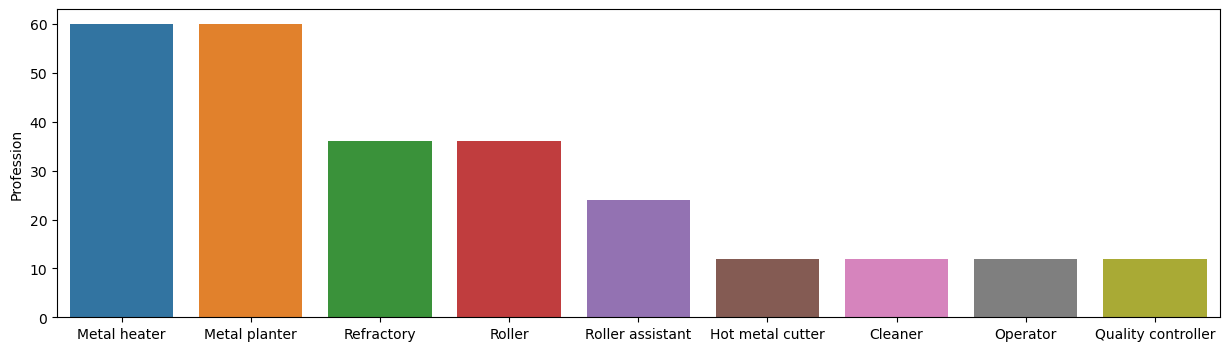

In [13]:
plt.figure(figsize=(15,4))
sb.barplot(x=profissoes,y=df.Profession.value_counts())
plt.show()

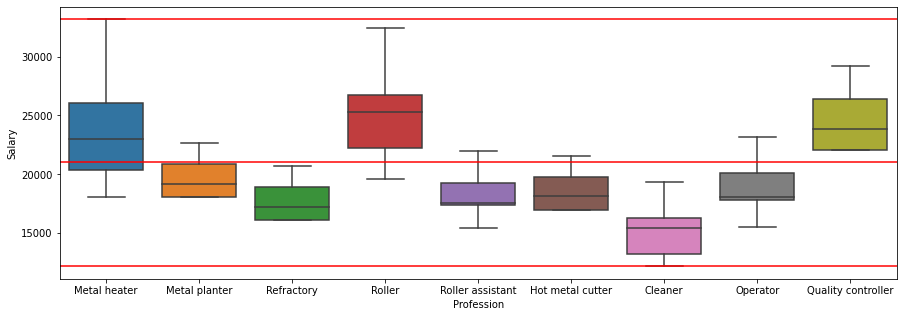

In [ ]:
plt.figure(figsize=(15,5))
sb.boxplot(x=df.Profession,y=df.Salary)
plt.axhline(max(df.Salary),color='r')
plt.axhline(min(df.Salary),color='r')
plt.axhline(df.Salary.mean(),color='r')
plt.show()

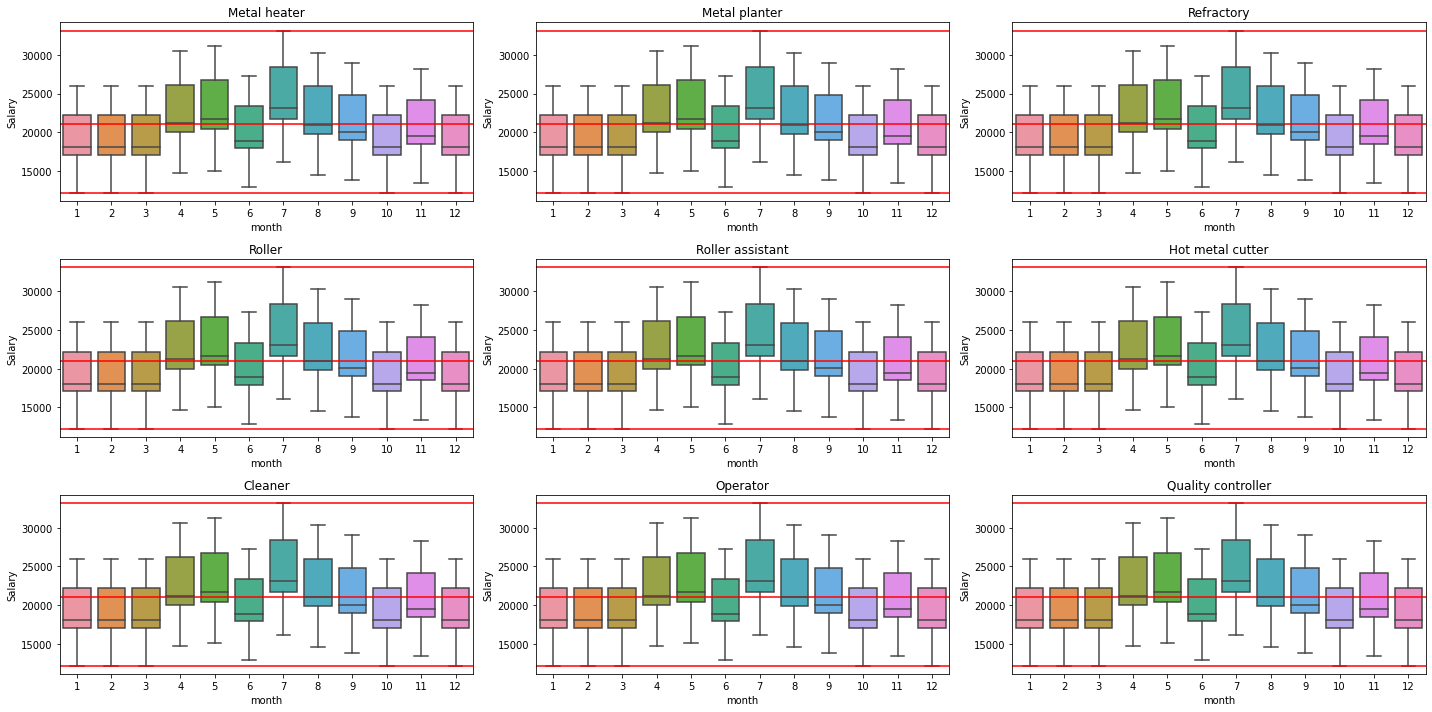

In [ ]:
#Lembra que Date tinha uma influência no salário? Vamos ver como isso se mostra nas profissões
fig_number = 1
plt.figure(figsize=(20,10))

for prof in profissoes:
  plt.subplot(3,3,fig_number)
  plt.title(prof)
  sb.boxplot(x=df.month,y=df.Salary)
  plt.axhline(max(df.Salary),color='r')
  plt.axhline(min(df.Salary),color='r')
  plt.axhline(df.Salary.mean(),color='r')
  fig_number += 1

plt.tight_layout()
plt.show()

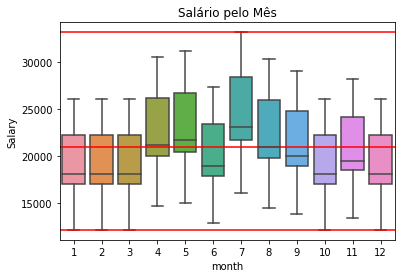

In [ ]:
sb.boxplot(x=df.month,y=df.Salary)
plt.title('Salário pelo Mês')
plt.axhline(max(df.Salary),color='r')
plt.axhline(min(df.Salary),color='r')
plt.axhline(df.Salary.mean(),color='r')
plt.show()

#Conclusões até aqui: 
# 1 - Metal heater é uma profissão que apresenta a maior variabilidade de salários dentro da fábrica, o que indica uma possível progressão de carreira.
# 2 - A variável Date influência o salário das profissões da mesma forma que influência os salários no cenário geral, tendo um pico no mês 7.



---



# **Ansalisando com mais detalhes a distribuição de salários na profissão Metal heater**

In [ ]:
#importando Numpy (Álgebra Linear)
import numpy as np

In [ ]:
#Criando duas bases separadas para a profissão
prof_1 = 'Metal heater'
df_1 = df.loc[df.Profession == prof_1]

In [ ]:
df_1.tail()

,Date,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary,month
220,2009-12-01,Metal heater,7,Heating furnaces,22,810,26020.0,12
221,2009-12-01,Metal heater,6,Heating furnaces,22,810,22980.0,12
222,2009-12-01,Metal heater,5,Heating furnaces,22,810,20350.0,12
223,2009-12-01,Metal heater,5,Heating furnaces,22,810,20350.0,12
224,2009-12-01,Metal heater,4,Heating furnaces,22,810,18090.0,12


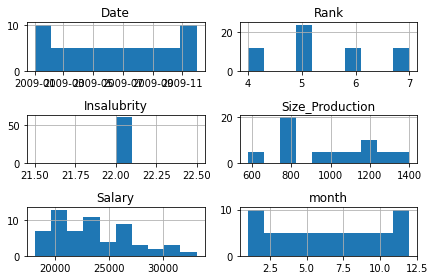

In [ ]:
df_1.hist()
plt.tight_layout()
plt.show()

 
2934 x + 7552


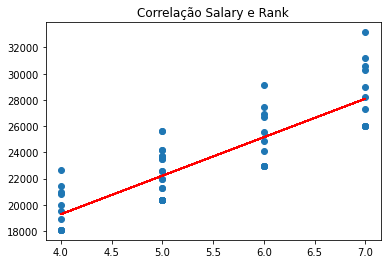

In [ ]:
#Correlação entre salário e Rank
plt.title('Correlação Salary e Rank')
plt.scatter(x=df_1.Rank,y=df_1.Salary)
z = np.polyfit(x=df_1.Rank,y=df_1.Salary,deg=1) #Achando coeficiente entre as variáveis
p = np.poly1d(z) #Gerando uma expressão álgebrica entre elas usando os coeficientes
print(p)
plt.plot(df_1.Rank,p(df_1.Rank),color='r')
plt.show()

 
-1.972e-19 x + 22


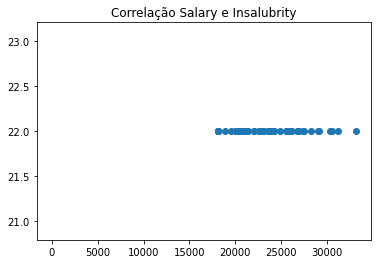

In [ ]:
#Correlação entre salário e Insalubrity
plt.title('Correlação Salary e Insalubrity')
plt.scatter(x=df_1.Salary,y=df_1.Insalubrity)
z = np.polyfit(x=df_1.Salary,y=df_1.Insalubrity,deg=1) #Achando coeficiente entre as variáveis
p = np.poly1d(z) #Gerando uma expressão álgebrica entre elas usando os coeficientes
print(p)
plt.plot(df_1.Rank,p(df_1.Salary),color='r')
plt.show()

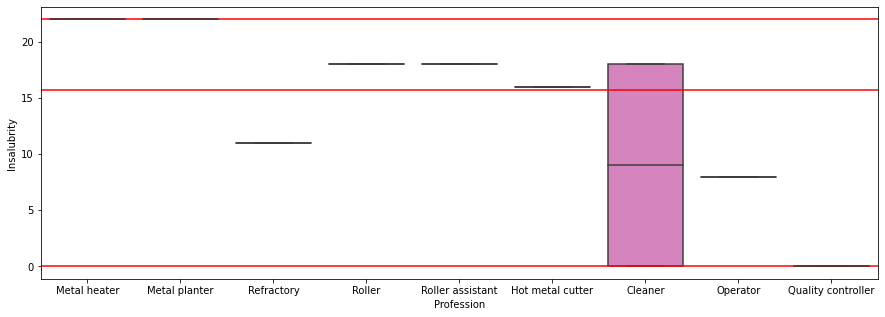

In [ ]:
#Avaliando insalubridade entre cargos
plt.figure(figsize=(15,5))
sb.boxplot(x=df.Profession,y=df.Insalubrity)
plt.axhline(max(df.Insalubrity),color='r')
plt.axhline(min(df.Insalubrity),color='r')
plt.axhline(df.Insalubrity.mean(),color='r')
plt.show()

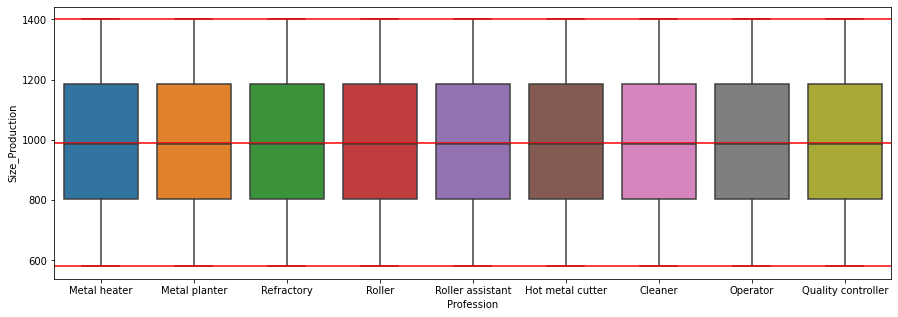

In [ ]:
#Avaliando Size_Production entre cargos
plt.figure(figsize=(15,5))
sb.boxplot(x=df.Profession,y=df.Size_Production)
plt.axhline(max(df.Size_Production),color='r')
plt.axhline(min(df.Size_Production),color='r')
plt.axhline(df.Size_Production.mean(),color='r')
plt.show()

In [ ]:
df.head()

,Date,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary,month
0,2009-01-01,Metal heater,7,Heating furnaces,22,580,26020.0,1
1,2009-01-01,Metal heater,6,Heating furnaces,22,580,22980.0,1
2,2009-01-01,Metal heater,5,Heating furnaces,22,580,20350.0,1
3,2009-01-01,Metal heater,5,Heating furnaces,22,580,20350.0,1
4,2009-01-01,Metal heater,4,Heating furnaces,22,580,18090.0,1


#***Conclusões finais da análise***

1.   **Date** tem influência no salário, pois observou-se uma relação entre a data dos dados e os valores dos salário. Quando investigada com mais detalhes mostrou-se está correlacionada com a variável **Size_Production**

2.   **Rank** tem forte influência no salário, pois conforme este aumenta, o primeiro aumenta de forma direta.

3.   **Insalubrity** impacta fortemente no salário, pois observou-se que conforme seu valor aumenta a tendência é que o salário aumente, mesmo em certas profisões o valor da medida se manter constante.

4.   **Size_Production** é o mesmo para toda a equipe, não importando a profissão.

5.   **Profession** é uma variável importante para essa previsão, pois impacta fortemente na variabilidade dos salários. (Ex: Mesmo com insalubridade 0, um *Quality controller* já ganha acima da média salárial da fábrica)



# ***CRIANDO UM MODELO PREDITIVO (LinearRegression)***

**Tratando os dados**

In [ ]:
df_model_1 =df[['month','Profession','Rank','Insalubrity','Salary','Size_Production']]

In [ ]:
df_model_1.head()

,month,Profession,Rank,Insalubrity,Salary,Size_Production
0,1,Metal heater,7,22,26020.0,580
1,1,Metal heater,6,22,22980.0,580
2,1,Metal heater,5,22,20350.0,580
3,1,Metal heater,5,22,20350.0,580
4,1,Metal heater,4,22,18090.0,580


In [ ]:
df_model_1 = pd.get_dummies(data=df_model_1)
df_model_1.tail()

,month,Rank,Insalubrity,Salary,Size_Production,Profession_Cleaner,Profession_Hot metal cutter,Profession_Metal heater,Profession_Metal planter,Profession_Operator,Profession_Quality controller,Profession_Refractory,Profession_Roller,Profession_Roller assistant
259,8,7,0,26342.235294,1180,0,0,0,0,0,1,0,0,0
260,9,7,0,25044.588235,1080,0,0,0,0,0,1,0,0,0
261,10,7,0,22060.000000,780,0,0,0,0,0,1,0,0,0
262,11,7,0,24266.000000,1020,0,0,0,0,0,1,0,0,0
263,12,7,0,22060.000000,810,0,0,0,0,0,1,0,0,0


**Selecionamos apenas aquelas variáveis que consideramos interessantes para o model, no caso das 8 originais, somente 7. E transformamos a variável Profession em uma "variável binária" atráves do método get_dummies do Pandas.**

In [ ]:
df_model_1 = pd.get_dummies(data=df_model_1)
df_model_1.tail()

,month,Rank,Insalubrity,Salary,Size_Production,Profession_Cleaner,Profession_Hot metal cutter,Profession_Metal heater,Profession_Metal planter,Profession_Operator,Profession_Quality controller,Profession_Refractory,Profession_Roller,Profession_Roller assistant
259,8,7,0,26342.235294,1180,0,0,0,0,0,1,0,0,0
260,9,7,0,25044.588235,1080,0,0,0,0,0,1,0,0,0
261,10,7,0,22060.000000,780,0,0,0,0,0,1,0,0,0
262,11,7,0,24266.000000,1020,0,0,0,0,0,1,0,0,0
263,12,7,0,22060.000000,810,0,0,0,0,0,1,0,0,0


**Criando o modelo (LinearRegression)**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X = df_model_1.drop(columns='Salary')
y = df_model_1.Salary
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
modelo = LinearRegression()
modelo.fit(X_train,y_train)

LinearRegression()

**Avaliando o modelo**

In [ ]:
y_model_predict = modelo.predict(X_test)

In [ ]:
y_model_predict

array([24768.77025451, 24963.83869692, 10540.24753105, 21671.08126691,
       23394.50233426, 25620.75015112, 15457.1604266 , 15195.49020672,
       28731.75345222, 22991.52181172, 22797.53449835, 17962.32640476,
       15524.87204603, 18369.10324944, 19334.69585556, 24100.07612572,
       15606.62247626, 24254.27058886, 22585.41616988, 17270.82013702,
       22860.12160237, 25478.33836256, 17678.3644888 , 24606.89719184,
       20774.70098053, 20466.9156202 , 16647.96300045, 18303.00174893,
       12118.00287087, 20289.35271684, 25206.32770542, 27284.4229649 ,
       25086.36941924, 23719.88985697, 26184.65253166, 22028.02277199,
       19377.58958781, 22542.52243764, 26894.22063972, 14869.38494398,
       17930.08590121, 22824.85282214, 16551.91125736, 21022.58878986,
       16531.74826548, 24429.45796503, 16210.65915046, 27190.08651379,
       19374.53723157, 23390.50801766, 21195.28366545, 17522.8704844 ,
       17337.1123819 , 22377.37128382, 18260.10801669, 21164.26020079,
      

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
mse = mean_squared_error(y_test, y_model_predict)
mae = mean_absolute_error(y_test, y_model_predict)
r2 = r2_score(y_test, y_model_predict)
evs = explained_variance_score(y_test, y_model_predict)

print(f'O erro médio quadrado é {mse:.2f}')
print(f'A média absoluta de erro é {mae:.2f}')
print(f'O meu R²(coeficiente de determinação) é {r2:.2f}')
print(f'A variância entre meus dados é {evs:.2f}')

O erro médio quadrado é 367202.51
A média absoluta de erro é 459.42
O meu R²(coeficiente de determinação) é 0.98
A variância entre meus dados é 0.98


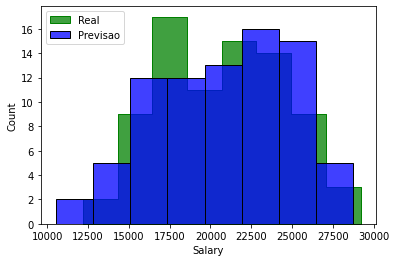

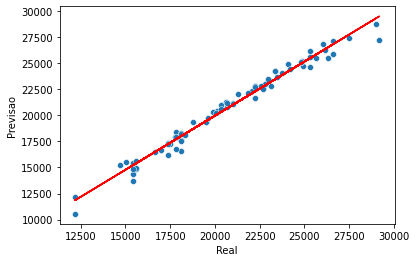

In [ ]:
sb.histplot(y_test,label="Real",color="g",element="step")
sb.histplot(y_model_predict,label="Previsao",color="b")
plt.legend()
plt.show()

plt.xlabel("Real")
plt.ylabel("Previsao")
sb.scatterplot(x=y_test,y=y_model_predict)
z = np.polyfit(x=y_test,y=y_model_predict,deg=1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color='r')
plt.show()

# ***CRIANDO UM MODELO PREDITIVO (RandomForest)***

**Tratando os dados**

In [ ]:
df_model_2 =df[['month','Profession','Rank','Insalubrity','Salary']]

In [ ]:
df_model_2 = pd.get_dummies(data=df_model_2)
df_model_2.head()

,month,Rank,Insalubrity,Salary,Profession_Cleaner,Profession_Hot metal cutter,Profession_Metal heater,Profession_Metal planter,Profession_Operator,Profession_Quality controller,Profession_Refractory,Profession_Roller,Profession_Roller assistant
0,1,7,22,26020.0,0,0,1,0,0,0,0,0,0
1,1,6,22,22980.0,0,0,1,0,0,0,0,0,0
2,1,5,22,20350.0,0,0,1,0,0,0,0,0,0
3,1,5,22,20350.0,0,0,1,0,0,0,0,0,0
4,1,4,22,18090.0,0,0,1,0,0,0,0,0,0


**Criando o modelo (RandomForest)**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = df_model_2.drop(columns='Salary')
y = df_model_2.Salary
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
modelo_2 = RandomForestRegressor()
modelo_2.fit(X_train,y_train)

RandomForestRegressor()

**Avaliando o modelo**

In [ ]:
y_model_predict = modelo_2.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
mse = mean_squared_error(y_test, y_model_predict)
mae = mean_absolute_error(y_test, y_model_predict)
r2 = r2_score(y_test, y_model_predict)
evs = explained_variance_score(y_test, y_model_predict)

print(f'O erro médio quadrado é {mse:.2f}')
print(f'A média absoluta de erro é {mae:.2f}')
print(f'O meu R² é {r2:.2f}')
print(f'A variância entre meus dados é {evs:.2f}')

O erro médio quadrado é 1189560.31
A média absoluta de erro é 805.85
O meu R² é 0.92
A variância entre meus dados é 0.93


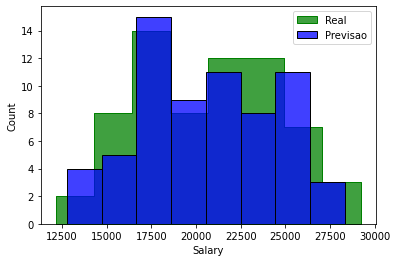

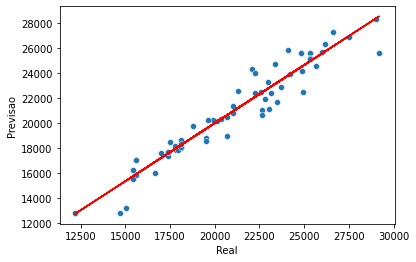

In [ ]:
sb.histplot(y_test,label="Real",color="g",element="step")
sb.histplot(y_model_predict,label="Previsao",color="b")
plt.legend()
plt.show()

plt.xlabel("Real")
plt.ylabel("Previsao")
sb.scatterplot(x=y_test,y=y_model_predict)
z = np.polyfit(x=y_test,y=y_model_predict,deg=1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),color='r')
plt.show()

# **TESTANDO NOVOS DADOS**

In [ ]:
colunas = df_model_1.drop(columns='Salary').columns.to_list()
valores =[[1,5,22,580,0,0,1,0,0,0,0,0,0]]
novos_dados_1 = pd.DataFrame(data=valores,columns=colunas)
novos_dados_1

,month,Rank,Insalubrity,Size_Production,Profession_Cleaner,Profession_Hot metal cutter,Profession_Metal heater,Profession_Metal planter,Profession_Operator,Profession_Quality controller,Profession_Refractory,Profession_Roller,Profession_Roller assistant
0,1,5,22,580,0,0,1,0,0,0,0,0,0


In [ ]:
colunas = df_model_2.drop(columns='Salary').columns.to_list()
valores =[[1,5,22,0,0,1,0,0,0,0,0,0]]
novos_dados_2 = pd.DataFrame(data=valores,columns=colunas)
novos_dados_2

,month,Rank,Insalubrity,Profession_Cleaner,Profession_Hot metal cutter,Profession_Metal heater,Profession_Metal planter,Profession_Operator,Profession_Quality controller,Profession_Refractory,Profession_Roller,Profession_Roller assistant
0,1,5,22,0,0,1,0,0,0,0,0,0


In [ ]:
dados_teste = df.iloc[2:3,:]
dados_teste

,Date,Profession,Rank,Equipment,Insalubrity,Size_Production,Salary,month
2,2009-01-01,Metal heater,5,Heating furnaces,22,580,20350.0,1


In [ ]:
valor_teste = float(dados_teste.Salary)
prev_lr = float(modelo.predict(novos_dados_1))
prev_rf = float(modelo_2.predict(novos_dados_2))

print(f'O valor real do salário era: {valor_teste:.2f}')
print(f'O modelo de LinearRegression preveu o valor de: {prev_lr:.2f}. O desvio foi de {((prev_lr/valor_teste)-1)*100:.2f}%')
print(f'O modelo de RandomForest preveu o valor de: {prev_rf:.2f}. O desvio foi de {((prev_rf/valor_teste)-1)*100:.2f}%')

O valor real do salário era: 20350.00
O modelo de LinearRegression preveu o valor de: 19444.83. O desvio foi de -4.45%
O modelo de RandomForest preveu o valor de: 20338.54. O desvio foi de -0.06%
